In [90]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import torch
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, get_esd_plot

In [92]:
num_iter = 100 # number of iterations for SLQ

In [93]:
def generate_eigenvalues(size, num_around_zero, num_extremes, low, high):
    tensor = torch.zeros(size)
    extreme_indices = torch.randperm(size)[:num_extremes]
    around_zero_indices = torch.randperm(size)[:num_around_zero] 
    extreme_values = torch.empty(num_extremes).uniform_(low, high)
    around_zero_values = torch.empty(num_around_zero).uniform_(-1, 1)
    tensor[extreme_indices] = extreme_values
    tensor[around_zero_indices] = around_zero_values
    return tensor

#### Generate eigenvalues

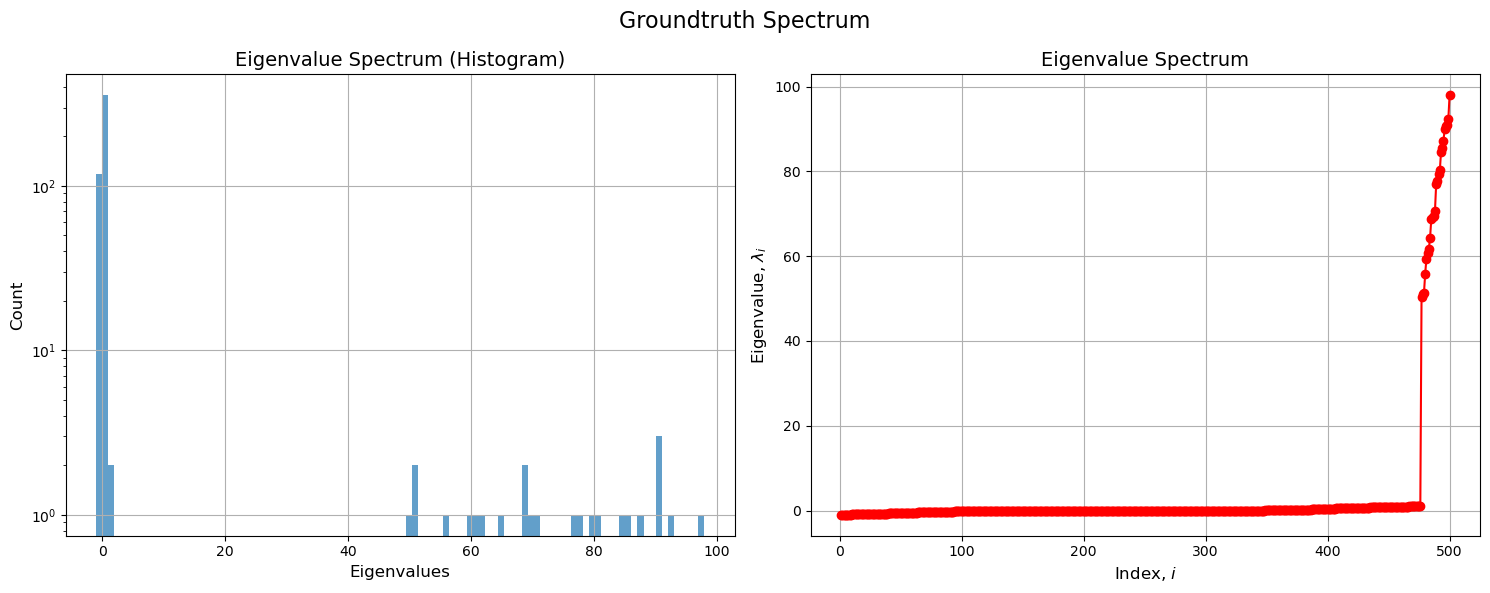

In [142]:
mtx_size = 500
num_bins = 100
# eigenvalues = torch.empty(mtx_size).uniform_(-1, 1)
eigenvalues = generate_eigenvalues(mtx_size, num_around_zero=250, num_extremes=50, low=50, high=100)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [143]:
mtx = matrix(eigenvalues)

#### Sanity check

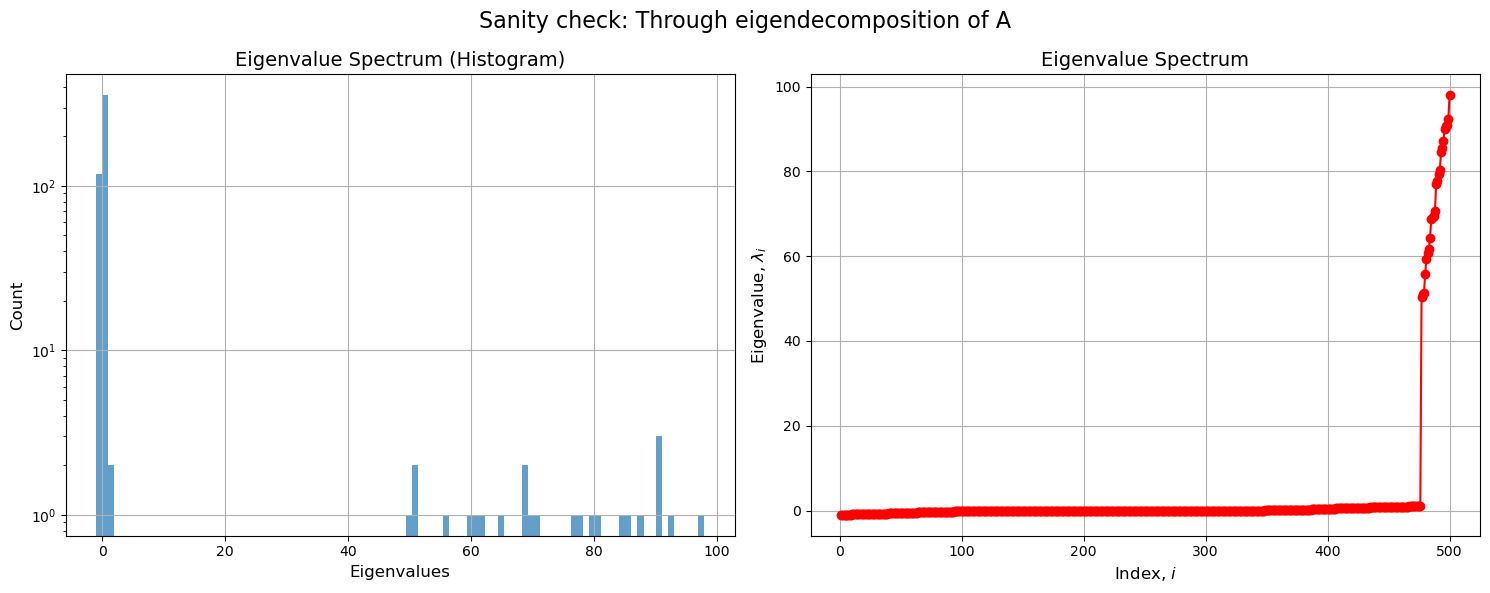

In [144]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Through eigendecomposition of A') 

#### Slow Lanczos algorithm

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:04<00:00, 102.41it/s]


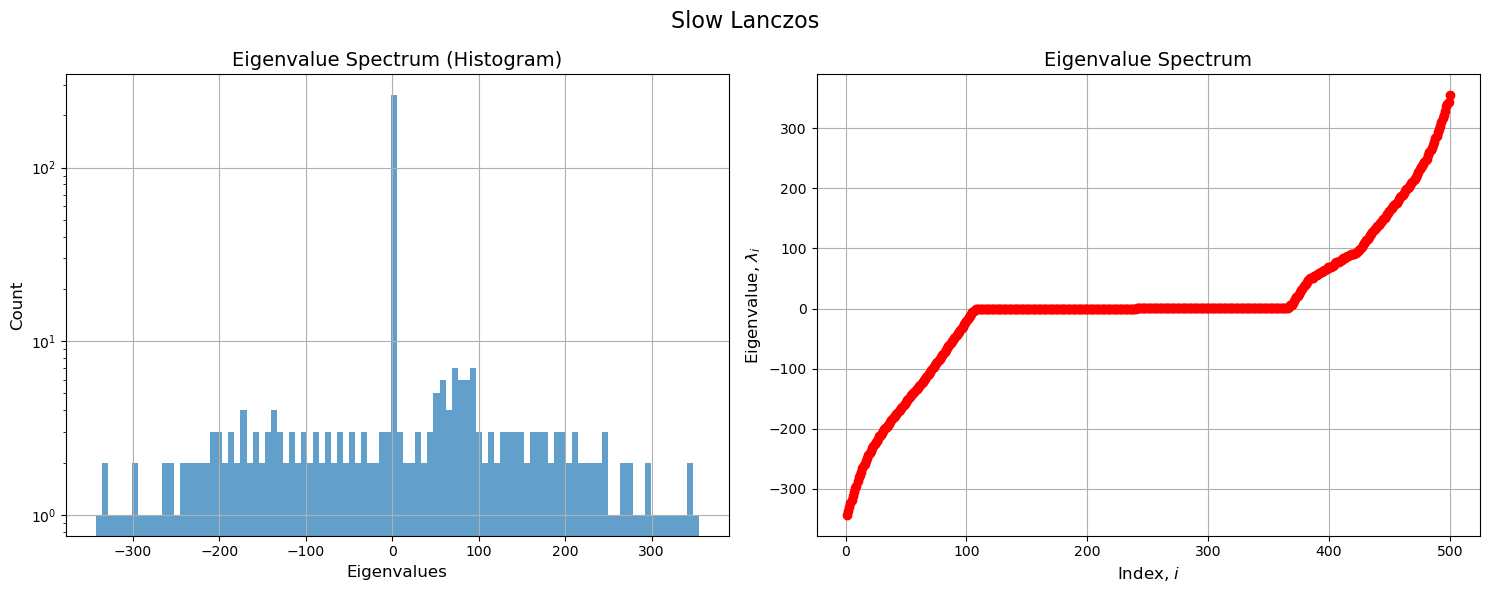

In [145]:
eigenvalues_slow_lanczos, _ = mtx.slow_lanczos(mtx_size)
plot_spectrum_combined(eigenvalues_slow_lanczos, num_bins=num_bins, title='Slow Lanczos')

#### Fast Lanczos algorithm

100%|██████████| 500/500 [00:04<00:00, 115.36it/s]


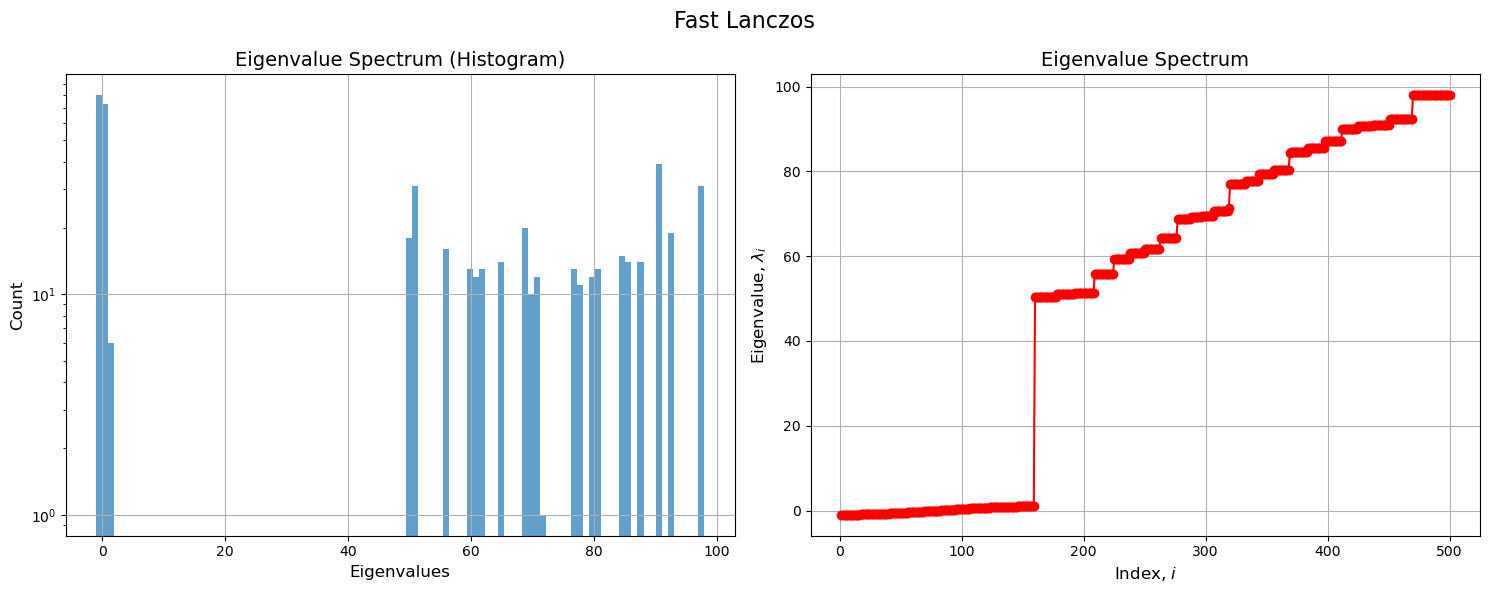

In [146]:
eigenvalues_fast_lanczos, _ =  mtx.fast_lanczos(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos, num_bins=num_bins, title='Fast Lanczos')

#### SLQ with Slow Lanczos algorithm

100%|██████████| 100/100 [00:01<00:00, 99.29it/s]


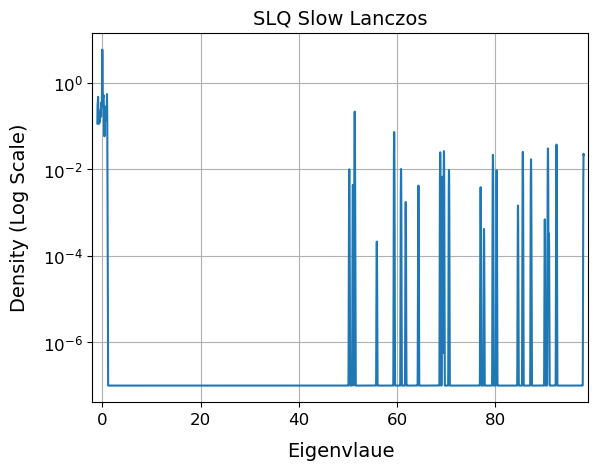

In [147]:
eigenvalues_SLQ_slow, weights_SLQ_slow = mtx.stochastic_lanczos_quadrature('slow', num_iter)
get_esd_plot(eigenvalues_SLQ_slow, weights_SLQ_slow, title='SLQ Slow Lanczos')

#### SLQ with Fast Lanczos algorithm

100%|██████████| 100/100 [00:00<00:00, 114.40it/s]


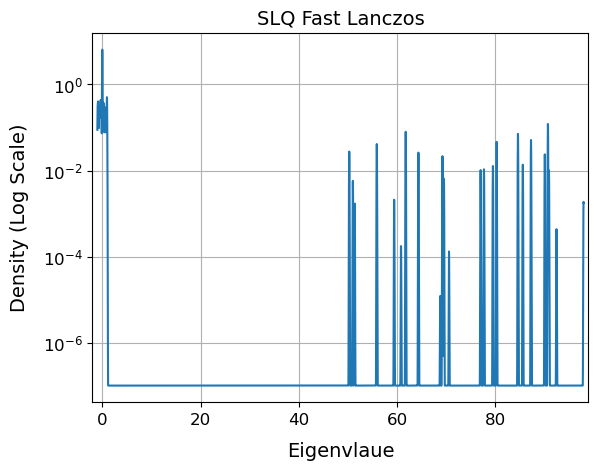

In [148]:
eigenvalues_SLQ_fast, weights_SLQ_fast = mtx.stochastic_lanczos_quadrature('fast', num_iter)
get_esd_plot(eigenvalues_SLQ_fast, weights_SLQ_fast, title='SLQ Fast Lanczos')